In [22]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_circles,make_blobs
from sklearn.datasets import load_digits, load_breast_cancer, load_wine
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import normalize

In [23]:
RANDOM_STATE = 42

features, target = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

In [24]:
model = LogisticRegression()
model.fit(X_train,y_train)

print(model.coef_)
print(model.intercept_)

[[-0.28827893  0.29190807  0.24199185 -0.26965558 -0.01937224  0.31863849
   0.69689257 -0.00932942  0.07836301  0.08404414 -0.02447358  0.38429452
   0.00908441]
 [ 0.68262263 -0.67573186 -0.26976127  0.11835302 -0.00644154  0.16275309
   0.28934757  0.0438637   0.3858124  -1.08008814  0.27103165  0.40668721
  -0.00776044]
 [-0.3943437   0.38382379  0.02776942  0.15130257  0.02581378 -0.48139158
  -0.98624014 -0.03453427 -0.46417541  0.996044   -0.24655807 -0.79098172
  -0.00132396]]
[-0.07431296  0.1297238  -0.05541084]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
predict = model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,predict))
print("Macro F1:",f1_score(y_test,predict,average='macro'))
#print(X_train.shape)

Accuracy: 0.9814814814814815
Macro F1: 0.983239053006495


In [32]:
XN = X_train.copy()
XT = X_test.copy()

for i in range(X_train.shape[1]):
    XN[:,i] = ( X_train[:,i]-np.mean(X_train[:,i]) )/np.std(X_train[:,i])
    XT[:,i] = ( X_test[:,i]-np.mean(X_test[:,i]) )/np.std(X_test[:,i])
    #print('[',np.min( XN[:,i] ), np.max( XN[:,i] ) ,']')

model = LogisticRegression()
model.fit(XN,y_train)

predict = model.predict(XT)
print("Accuracy:",accuracy_score(y_test,predict))
print("Macro F1:",f1_score(y_test,predict,average='macro'))


Accuracy: 0.9814814814814815
Macro F1: 0.9803756658256239


# **Modelo Cuadratico**

In [27]:
XX = np.concatenate((features,features**2),axis=1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(XX, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)
model = LogisticRegression()
model.fit(X_train_2,y_train_2)
print(model.coef_)
print(model.intercept_)

[[-1.25146087e-04 -3.59111961e-05 -1.98266113e-05 -3.37825495e-04
  -5.96693509e-04  3.81986008e-06  3.31604273e-05 -7.88811882e-06
  -1.29663366e-07 -7.34032400e-05 -5.86514007e-06  5.43493057e-06
  -4.12623225e-03 -1.21029976e-03 -1.51410544e-04 -2.35279194e-05
  -8.57383915e-03 -4.14044773e-05  7.06456681e-05  1.61838776e-04
  -4.78682562e-06  2.29075897e-05 -7.11970148e-04 -2.17273163e-06
   1.02205253e-04  1.12686441e-05]
 [ 7.31352853e-05 -7.23632898e-05  8.88722506e-06  2.16761312e-04
   4.89107495e-04  5.55002671e-05  8.76458824e-05  4.31975728e-07
   5.33579576e-05 -2.40239404e-04  3.59931920e-05  1.01361539e-04
   2.27513837e-03 -2.86069215e-05 -4.41660564e-04 -1.87520929e-05
   4.39701395e-03  1.02524925e-04  1.87286857e-04  2.36408874e-04
  -1.23527318e-06  1.47004170e-04 -2.85227806e-03  5.70573997e-05
   4.01864138e-04 -7.49652901e-06]
 [ 5.20108014e-05  1.08274486e-04  1.09393863e-05  1.21064183e-04
   1.07586014e-04 -5.93201272e-05 -1.20806310e-04  7.45614309e-06
  -5.3

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
predict = model.predict(X_test_2)

print("Accuracy:",accuracy_score(y_test,predict))
print("Macro F1:",f1_score(y_test,predict,average='macro'))

Accuracy: 0.7777777777777778
Macro F1: 0.7619047619047619


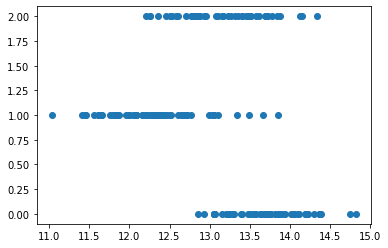

In [29]:
plt.figure()
plt.scatter(features[:,0],target)
plt.show()